# Machine Learning Essentials with Python  
## Day 1

In [1]:
!source ./bin/activate # non-python commmand to load the virtual environment

# Import packages
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # label encoding for 2 values in single column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ModuleNotFoundError: No module named 'pandas'

Load data to preprocess

In [4]:
# Load data raw from Git
url = 'https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/data_preprocess1.csv'
df = pd.read_csv(url)

In [5]:
print(df)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Germany  40.0      NaN       Yes
5    France  35.0  58000.0       Yes
6     Spain   NaN  52000.0        No
7    France  48.0  79000.0       Yes
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
10  Germany  28.0  49000.0       Yes
11   France  42.0  75000.0        No
12    Spain  33.0  56000.0       Yes
13  Germany  45.0  77000.0        No
14   France  29.0  51000.0       Yes
15    Spain  51.0  85000.0        No
16  Germany  36.0      NaN        No
17   France  31.0  55000.0        No
18    Spain  39.0  63000.0       Yes
19  Germany  47.0  80000.0       Yes
20   France  26.0  47000.0        No
21    Spain  32.0  53000.0        No
22  Germany  41.0  71000.0       Yes
23   France  49.0  82000.0        No
24    Spain  34.0  57000.0       Yes
25  Germany  43.0  74000.0        No
2

In [6]:
# Check metadata info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    30 non-null     object 
 1   Age        29 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  30 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [7]:
# Print top five rows 
df.head()
# Print bottom rows
df.tail()

,Country,Age,Salary,Purchased
25,Germany,43.0,74000.0,No
26,France,52.0,88000.0,Yes
27,Spain,46.0,78000.0,No
28,Germany,25.0,45000.0,Yes
29,France,53.0,90000.0,No


In [8]:
# Access a particlular column 
df['Age']

0     44.0
1     27.0
2     30.0
3     38.0
4     40.0
5     35.0
6      NaN
7     48.0
8     50.0
9     37.0
10    28.0
11    42.0
12    33.0
13    45.0
14    29.0
15    51.0
16    36.0
17    31.0
18    39.0
19    47.0
20    26.0
21    32.0
22    41.0
23    49.0
24    34.0
25    43.0
26    52.0
27    46.0
28    25.0
29    53.0
Name: Age, dtype: float64

In [9]:
# more than one 
df[['Age','Salary']] 

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [10]:
df.iloc[ : 0] # [row, column]
df.iloc[ :, 0:2] # All rows, first 3 columns 

,Country,Age
0,France,44.0
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0


In [11]:
# Supervised ML 
# Input (features)
# Output (label)

# Separate data into input and output
features = df.iloc[:, 0:3].values # Do not want last column & convert to mumpy array (.values)
label = df.iloc[:, -1].values # Only want last colunm as numpy array

In [12]:
# Check for missing information and remove row
df_impute = SimpleImputer(missing_values=np.nan, strategy='mean')

In [13]:
df_impute.fit(features[:, 1:3])
features[:, 1:3] = df_impute.transform(features[:, 1:3])

In [14]:
print(features)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 66071.42857142857]
 ['France' 35.0 58000.0]
 ['Spain' 39.0 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Germany' 28.0 49000.0]
 ['France' 42.0 75000.0]
 ['Spain' 33.0 56000.0]
 ['Germany' 45.0 77000.0]
 ['France' 29.0 51000.0]
 ['Spain' 51.0 85000.0]
 ['Germany' 36.0 66071.42857142857]
 ['France' 31.0 55000.0]
 ['Spain' 39.0 63000.0]
 ['Germany' 47.0 80000.0]
 ['France' 26.0 47000.0]
 ['Spain' 32.0 53000.0]
 ['Germany' 41.0 71000.0]
 ['France' 49.0 82000.0]
 ['Spain' 34.0 57000.0]
 ['Germany' 43.0 74000.0]
 ['France' 52.0 88000.0]
 ['Spain' 46.0 78000.0]
 ['Germany' 25.0 45000.0]
 ['France' 53.0 90000.0]]


In [15]:
# Need to change all data to numeric
# Convert yes/no to binary 0/1
le = LabelEncoder()
label = le.fit_transform(label)
print(label)

[0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]


In [16]:
# Categroical variables (OneHotEncode)
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough') 

In [17]:
features = np.array(ct.fit_transform(features))
print(features)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 66071.42857142857]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 39.0 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 28.0 49000.0]
 [1.0 0.0 0.0 42.0 75000.0]
 [0.0 0.0 1.0 33.0 56000.0]
 [0.0 1.0 0.0 45.0 77000.0]
 [1.0 0.0 0.0 29.0 51000.0]
 [0.0 0.0 1.0 51.0 85000.0]
 [0.0 1.0 0.0 36.0 66071.42857142857]
 [1.0 0.0 0.0 31.0 55000.0]
 [0.0 0.0 1.0 39.0 63000.0]
 [0.0 1.0 0.0 47.0 80000.0]
 [1.0 0.0 0.0 26.0 47000.0]
 [0.0 0.0 1.0 32.0 53000.0]
 [0.0 1.0 0.0 41.0 71000.0]
 [1.0 0.0 0.0 49.0 82000.0]
 [0.0 0.0 1.0 34.0 57000.0]
 [0.0 1.0 0.0 43.0 74000.0]
 [1.0 0.0 0.0 52.0 88000.0]
 [0.0 0.0 1.0 46.0 78000.0]
 [0.0 1.0 0.0 25.0 45000.0]
 [1.0 0.0 0.0 53.0 90000.0]]


# Day 2

In [18]:
# Calling decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Split the data into training and testing (90/10)

In [19]:
# Input and Label split for ML algorithm
training_input, testing_input, train_label, test_label = train_test_split(features, label, test_size = 0.1)

In [20]:
classifier = DecisionTreeClassifier()

In [21]:
# Training classifier with above preprocess split data
trained_model = classifier.fit(training_input, train_label)

In [22]:
predicted_values = trained_model.predict(testing_input)
print(predicted_values)

[1 1 1]


In [23]:
# Actual values
print(test_label)

[0 1 1]


Evaluate model - Check model accuracy
- Accuracy score
- Confusion matrix
- precision, recall
- ROC curve and AUC (not prefered)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
# Using accracy score
accuracy_score(test_label, predicted_values) # actual value, predicted value
# Output from 0 to 1 

0.6666666666666666

In [26]:
# Test by new random dtaa
new_data = np.array([['Spain', '39', '51000']])

In [27]:
# Check decision tree graph
# sklearn has optoins to plot tree (conceptual format)
# Use a visualization library (matplotlib, seaborn)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

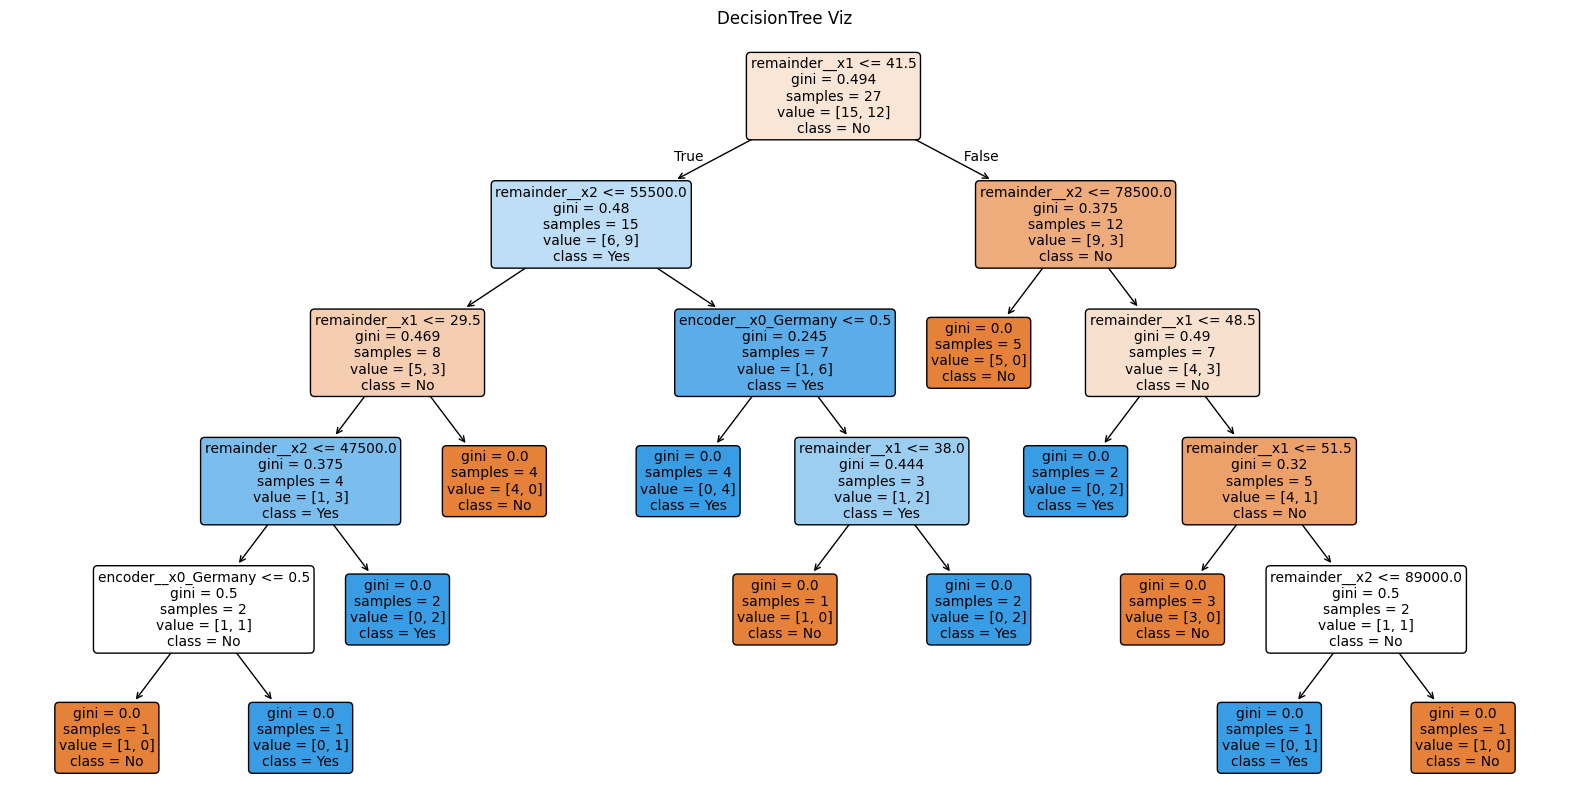

In [28]:
plt.figure(figsize = (20, 10))
plot_tree(
    classifier, 
    feature_names = ct.get_feature_names_out(),
    class_names = le.classes_, 
    filled = True, 
    fontsize = 10, 
    rounded = True
)
plt.title('DecisionTree Viz')
plt.show()

In [29]:
le.classes_

array(['No', 'Yes'], dtype=object)

# Exercise 

In [30]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor  # or another regression model
from sklearn.metrics import mean_squared_error, r2_score

## Read in the data

In [31]:
# Read in data, predict earthquake magnitude using regression
url = "https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv"
eq_df = pd.read_csv(url)
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

## Explore and Preprocess Data

In [32]:
print(eq_df.columns.tolist())

['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource']


In [33]:
print(eq_df.describe())

          latitude    longitude        depth          mag          nst  \
count  9593.000000  9593.000000  9593.000000  9592.000000  8018.000000   
mean     39.747022  -110.358770    21.106753     1.484010    22.797331   
std      18.465344    66.636675    55.831162     1.302522    22.549107   
min     -62.723800  -179.997100    -3.500000    -1.740000     0.000000   
25%      33.963667  -149.559300     2.380000     0.720000     9.000000   
50%      38.818333  -122.692167     6.860000     1.290000    16.000000   
75%      51.995167  -112.927667    14.200000     1.952500    28.000000   
max      85.684800   179.972400   648.298000     7.700000   437.000000   

               gap         dmin          rms  horizontalError   depthError  \
count  8018.000000  8017.000000  9592.000000      7317.000000  9592.000000   
mean    116.691455     0.437691     0.257719         1.656209     2.167916   
std      66.540691     1.742136     0.286726         3.722728     4.896922   
min      11.000000   

In [34]:
eq_df['place'].nunique() # Probably don't want to use in model
eq_df['type'].nunique() # OneHotEncode
eq_df.nunique()

time               9593
latitude           7959
longitude          8242
depth              3725
mag                 550
magType               9
nst                 160
gap                 694
dmin               5751
rms                 505
net                  15
id                 9593
updated            9592
place              4995
type                  4
horizontalError    1446
depthError         1992
magError           2574
magNst              191
status                2
locationSource       15
magSource            15
dtype: int64

In [35]:
# Move cols that might not be useful to model to different df
metadata_cols = ['updated', 'place', 'status']
metadata_df = eq_df[metadata_cols]
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   updated  9593 non-null   object
 1   place    9593 non-null   object
 2   status   9593 non-null   object
dtypes: object(3)
memory usage: 225.0+ KB


In [36]:
# Drop metadata columns 
eq_df = eq_df.drop(metadata_cols, axis = 1)
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  type             9593 non-null   object 
 13  horizontalError  7317 non-null   float64
 14  depthError       9592 non-null   float64
 15  magError         7994 non-null   float64
 16  magNst           8013 non-null   float64
 17  locationSource

## Split into response and explanatory 

In [37]:
# Identify explanatory (x) and response (y) vars
response_var = 'mag'
y = eq_df[response_var]
X = eq_df.drop(response_var, axis = 1)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   magType          9592 non-null   object 
 5   nst              8018 non-null   float64
 6   gap              8018 non-null   float64
 7   dmin             8017 non-null   float64
 8   rms              9592 non-null   float64
 9   net              9593 non-null   object 
 10  id               9593 non-null   object 
 11  type             9593 non-null   object 
 12  horizontalError  7317 non-null   float64
 13  depthError       9592 non-null   float64
 14  magError         7994 non-null   float64
 15  magNst           8013 non-null   float64
 16  locationSource   9593 non-null   object 
 17  magSource     

In [39]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9593 entries, 0 to 9592
Series name: mag
Non-Null Count  Dtype  
--------------  -----  
9592 non-null   float64
dtypes: float64(1)
memory usage: 75.1 KB


## Identify categorical and numberic columns

In [40]:
# Get categroical and numberical cols
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [41]:
print(categorical_cols)

['time', 'magType', 'net', 'id', 'type', 'locationSource', 'magSource']


In [42]:
print(numerical_cols)

['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']


### Handle missing valus  

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [44]:
# Numeric preprocessing (impute mean)
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

# Categorical preprocessing (impute most frequent + one-hot encode)
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols),
])

## Create a pipeline with regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

## Train-test split

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80/20

## Fit model

In [47]:
regression_pipeline.fit(X_train, y_train)

ValueError: Input y contains NaN.

## Regression model evaluation 
- MAE mean absolute error
- MSE mean square error
- RMSE
- R2 score